In [23]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import scipy as sklearn
from sklearn.cluster import KMeans
from scipy.spatial import distance
import pandas as pd
import math as mt 


file1="a0487.wav"#correct
file2="b0157.wav"# correct
file3="bps0001.wav"#correct
file4="com0001.wav"#correct
file5="deepak1.wav"#correct
file6="manav1.wav"#correct
file7="Prerna1.wav" # correct
file8="rahul1.wav"#correct
file9="utkarsh1.wav" #utkarsh ka prerna
file10="b0233.wav"#correct


testf="utkarsh2.wav"

data,fs=librosa.load(file1, sr=5000)
data2,fs2=librosa.load(file2, sr=5000)
data3,fs3=librosa.load(file3, sr=5000)
data4,fs4=librosa.load(file4, sr=5000)
data5,fs5=librosa.load(file5, sr=5000)
data6,fs6=librosa.load(file6, sr=5000)
data7,fs7=librosa.load(file7, sr=5000)
data8,fs8=librosa.load(file8, sr=5000)
data9,fs9=librosa.load(file1, sr=5000)
data10,fs10=librosa.load(file2, sr=5000)



test,ft8=librosa.load(testf, sr=5000)


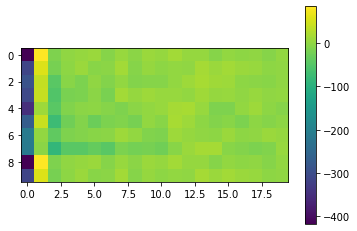

             a           b           c           d           e           f  \
0  -416.841614 -311.774719 -287.723602 -306.300049 -349.880249 -269.891235   
1    84.100990   57.361046   37.530537   40.344250   11.372751   42.186321   
2   -13.317367  -19.030630  -44.095467  -51.602589  -44.117714  -73.835510   
3     0.603329   -0.578671   -4.373412  -15.831586  -10.957563  -24.424511   
4     4.970998    8.032803  -13.771933  -15.452782   -2.711239   -9.718290   
5     9.004219   -4.715151   -0.041642   -3.706527   -1.838311  -27.499441   
6    -7.447844   -3.946255   -8.390213  -15.816613   -7.851877  -14.640116   
7     7.394260   14.932166    2.262142   15.514606  -11.816423  -10.554494   
8    -2.881518   -7.114347   -9.402965    5.153950   -2.533646  -18.561203   
9     9.294596    4.268297   -7.395939   10.914823    3.581580    1.958597   
10    5.647514   -1.971899   -7.695099    5.891882    5.998777   -5.121871   
11   14.525034    2.668189    1.950740    6.524982   15.843590  

/Users/nitishatal/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:972: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return_n_iter=True)


In [24]:
def mfccCompressed(arr):
    s=[]
    for i in range(0,20):
        for j in range(0,11):
            s.append(arr[i][j])        
    return s
#In this case, mfcc computed 20 MFCCs over 13 frames.

m1=librosa.feature.mfcc(y=data)
m11=m1.mean(axis=1)


m2=librosa.feature.mfcc(y=data2)
m22=m2.mean(axis=1)

m3=librosa.feature.mfcc(y=data3)
m33=m3.mean(axis=1)

m4=librosa.feature.mfcc(y=data4)
m44=m4.mean(axis=1)

m5=librosa.feature.mfcc(y=data5)
m55=m5.mean(axis=1)

m6=librosa.feature.mfcc(y=data6)
m66=m6.mean(axis=1)

m7=librosa.feature.mfcc(y=data7)
m77=m7.mean(axis=1)

m8=librosa.feature.mfcc(y=data8)
m88=m8.mean(axis=1)

m9=librosa.feature.mfcc(y=data9)
m99=m9.mean(axis=1)

m10=librosa.feature.mfcc(y=data10)
m100=m10.mean(axis=1)





mfcc1=mfccCompressed(m1)
mfcc2=mfccCompressed(m2)
mfcc3=mfccCompressed(m3)
mfcc4=mfccCompressed(m4)
mfcc5=mfccCompressed(m5)
mfcc6=mfccCompressed(m6)
mfcc7=mfccCompressed(m7)
mfcc8=mfccCompressed(m8)

vBook = (mfcc1, mfcc2, mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8)
vBook = np.vstack(vBook)


qBook=[]
qBook.append(m11)
qBook.append(m22)
qBook.append(m33)
qBook.append(m44)
qBook.append(m55)
qBook.append(m66)
qBook.append(m77)
qBook.append(m88)
qBook.append(m99)
qBook.append(m100)
#print(qBook)

#A = np.vstack((m11,m22))
plt.imshow(qBook)
plt.colorbar()
plt.show()

#merge=np.concatenate((mfcc1, mfcc2, mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8), axis=0)

#vBook = pd.DataFrame({
 #   'x': merge
#})
#print(vbook)
#qBook = np.array([mfcc1, mfcc2, mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8])


feature = pd.DataFrame({
    'a': m11,
    'b': m22,
    'c': m33,
    'd': m44,
    'e': m55,
    'f': m66,
    'g': m77,
    'h': m88,
    
}) 
print(feature)

#print(len(m1))

#training

kmeans = KMeans(n_clusters=10)
kmeans.fit(qBook)
print((kmeans.labels_))


centers=kmeans.cluster_centers_
#print(centers)


#test
t1=librosa.feature.mfcc(y=test)
mfcc_test=mfccCompressed(t1)
t1=t1.mean(axis=1)

o=[]
o.append(t1)
y_kmeans = kmeans.predict(o)
print(y_kmeans)

